### Generate Overlay Plots for Deep Learning results

In [1]:
def invertGreyImage(image):
    from copy import copy
    inverted = copy(image)
    for i,row in enumerate(image):
        for j,value in enumerate(row):
            if value >= 123:
                inverted[i,j] = 0
            if value < 123:
                inverted[i,j] = 255
    return inverted

def burnOverlay(colorImage, resultsImage, maskImage, copyDestination = ''):
    import matplotlib.pyplot as plt
    %matplotlib inline
    import matplotlib.image as mpimg
    from matplotlib.colors import colorConverter
    import matplotlib as mpl
    import numpy as np
    from shutil import copyfile
    import os as os
    
    # Read the images to be aligned
    im1 = mpimg.imread(colorImage);
    im2 = mpimg.imread(maskImage);
    im3 = mpimg.imread(resultsImage);
    
    # Invert the colors in the results image
    inverted_im3 = invertGreyImage(im3)

    # Plot overlay
    # generate the colors for your colormap
    color1 = colorConverter.to_rgba('blue')
    color2 = colorConverter.to_rgba('black')
    color3 = colorConverter.to_rgba('green')
    
    # make the colormaps
    cmap1 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap',['green','blue'],256)
    cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap2',[color2,color1],256)
    cmap3 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap2',[color2,color3],256)
    
    cmap2._init() # create the _lut array, with rgba values
    cmap3._init() # create the _lut array, with rgba values
    
    # create your alpha array and fill the colormap with them.
    # here it is progressive, but you can create whathever you want
    alphas = np.linspace(0, 0.5, cmap2.N+3)
    cmap2._lut[:,-1] = alphas
    cmap3._lut[:,-1] = alphas 
    
    # set-up the grid and axes
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(15,15))
    
    # adjust font sizes
    mpl.rcParams.update({'font.size': 22})
    
    # Plot figures
    ax1.imshow(im1)
    ax1.axis("off")
    ax1.set_title('Color reference', y = 0.9)
    
    ax2.imshow(im2, cmap="gray")
    ax2.axis("off")
    ax2.set_title('Ground truth', y = 0.9)
    
    ax3.imshow(im1, interpolation='nearest', cmap=cmap1)
    ax3.imshow(im3, interpolation='nearest', cmap=cmap2)
    ax3.axis("off")
    ax3.set_title('Computer detected location of \nnon-healing burn in purple', y = 0.9)
    
    ax4.imshow(im1, interpolation='nearest', cmap=cmap1)
    ax4.imshow(inverted_im3, interpolation='nearest', cmap=cmap3)
    ax4.axis("off")
    ax4.set_title('Computer detected location of \nhealing burn/other in green', y = 0.9)
    
    plt.show()
    
    # set destination directory
    if copyDestination != '':
        
        # Make Seve Folder
        newpath = copyDestination
        if not os.path.exists(newpath):
            os.makedirs(newpath)
            
        copyDestination = copyDestination + '/figure' + maskImage[-6:-4] + '.png'
        fig.savefig(copyDestination, bbox_inches='tight')


def findImages(resultsDir):
    import os as os

    # find the path of all the files in the RAW images directories
    imageFiles = []
    for dirName, subdirList, fileList in os.walk(resultsDir):
        for files in fileList:
            imageFiles.append(resultsDir + files)

    # keep only the path of specific images in the RAW images directories 
    colorImages = [image for image in imageFiles if 'raw' in image]
    resultsImages = [image for image in imageFiles if 'prediction' in image]
    maskImages = [image for image in imageFiles if 'mask' in image]  
    
    return zip(colorImages, resultsImages, maskImages)

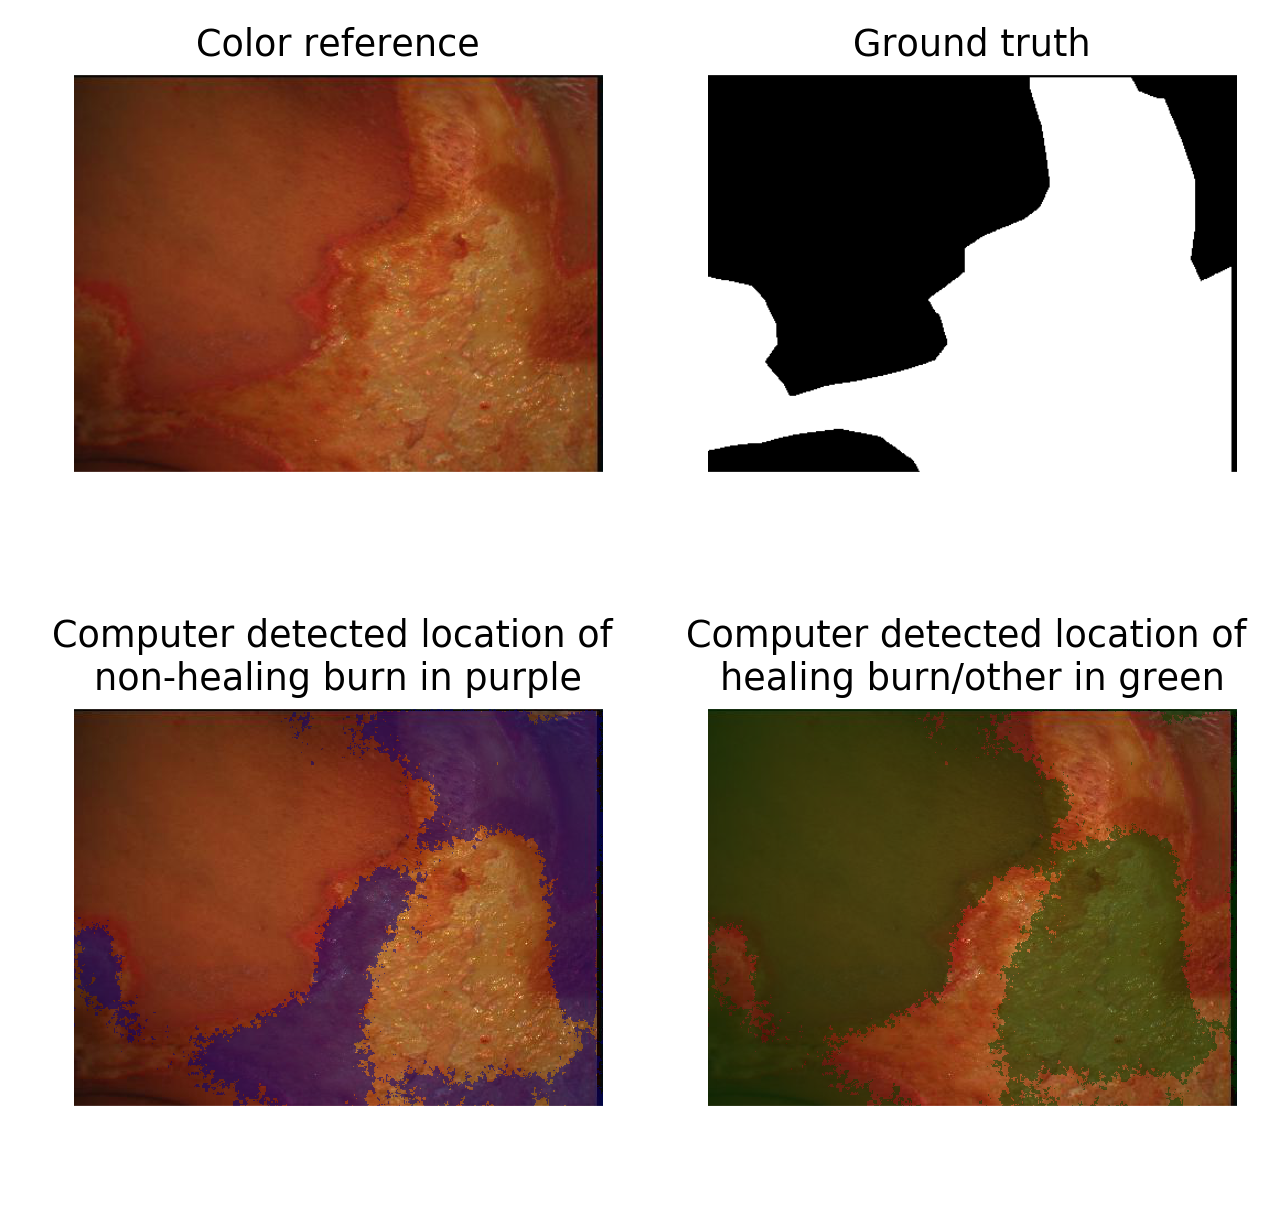

In [2]:
colorImage = 'C:/Users/JeffPC2/Google Drive/BARDA Contract Work Option I Supplemental/WFimages/Imaging_Results/Test1/raw_2.tif'
resultsImage = 'C:/Users/JeffPC2/Google Drive/BARDA Contract Work Option I Supplemental/WFimages/Imaging_Results/Test1/prediction_2.tif'
maskImage = 'C:/Users/JeffPC2/Google Drive/BARDA Contract Work Option I Supplemental/WFimages/Imaging_Results/Test1/mask2.tif'

burnOverlay(colorImage, resultsImage, maskImage)

In [3]:
results = findImages(resultsDir = 'Test1/')

for color,result,mask in results:
    burnOverlay(color, result, mask, copyDestination = 'Test1')

In [4]:
results = findImages(resultsDir = 'Test2/')

for color,result,mask in results:
    burnOverlay(color, result, mask, copyDestination = 'Test2')

In [5]:
results = findImages(resultsDir = 'Train1/')

for color,result,mask in results:
    burnOverlay(color, result, mask, copyDestination = 'Train1/Figures')

In [6]:
results = findImages(resultsDir = 'Train2/')

for color,result,mask in results:
    burnOverlay(color, result, mask, copyDestination = 'Train2/Figures')

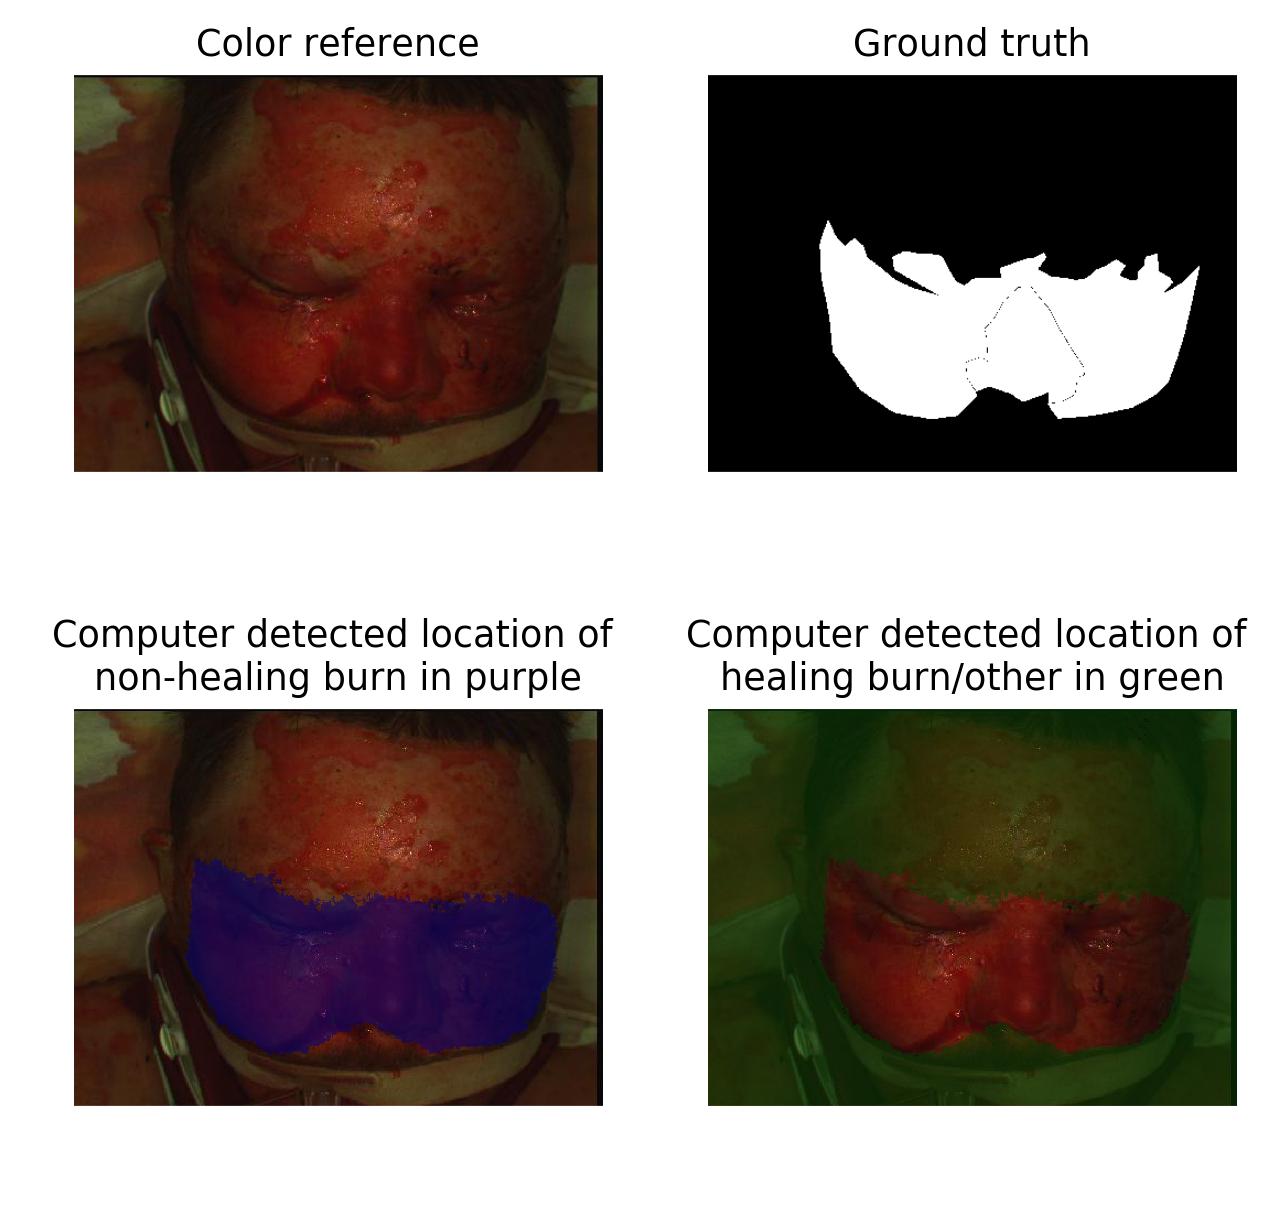

In [7]:
colorImage = 'C:/Users/JeffPC2/Google Drive/BARDA Contract Work Option I Supplemental/WFimages/Imaging_Results/Train1/raw_98.tif'
resultsImage = 'C:/Users/JeffPC2/Google Drive/BARDA Contract Work Option I Supplemental/WFimages/Imaging_Results/Train1/prediction_98.tif'
maskImage = 'C:/Users/JeffPC2/Google Drive/BARDA Contract Work Option I Supplemental/WFimages/Imaging_Results/Train1/mask98.tif'

burnOverlay(colorImage, resultsImage, maskImage, copyDestination = 'Abstract')